In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  
import matplotlib.pyplot as plt
from utils import *
from compare import compare



In [17]:
val_labels = loadLabels("data/val_labels/", 1000)
print("labels of {} images loaded".format(str(len(val_labels))))
print('first data:')
print(val_labels[0])

labels of 1000 images loaded
first data:
[(153, 125), (79, 151), (100, 153), (273, 177), (262, 202), (204, 206), (313, 228), (273, 230), (66, 255), (178, 285), (143, 298), (39, 304), (305, 312), (32, 334), (61, 347), (80, 349), (605, 44), (441, 94), (448, 109), (445, 117), (429, 165), (426, 173), (538, 177), (519, 209), (674, 212), (426, 223), (668, 227), (599, 266), (596, 275), (453, 293), (801, 98), (791, 137), (1058, 153), (1047, 201), (1049, 228), (817, 234), (1157, 269), (907, 282), (810, 285), (1125, 318), (898, 329), (1051, 333), (802, 341), (1086, 365), (1214, 103), (1328, 144), (1184, 147), (1195, 161), (1373, 194), (1214, 204), (1413, 240), (1487, 283), (1193, 292), (1180, 301), (1238, 366)]


In [18]:
resultPath = "data/val_results/"
archs = ["yolov3-peaks", "newpeaksv2", "newpeaksv3","newpeaksv4", "newpeaksv5"]

threshs = [0.005, 0.01, 0.02, 0.05, 0.10, 0.15, 0.20, 0.25, 0.3, 0.4, 0.5]
pre_vs_sen = {}

for arch in archs:
    print("******************************************")
    print("*****       validating " + arch)
    print("******************************************")
    val_results = loadResults(resultPath+arch+".json")
    print("results of {} images loaded".format(str(len(val_results))))
    print('first data has {} objects'.format(str(len(val_results[0]))))
    
    for thresh in threshs:
        print("========== threshold " + str(thresh) + " ==========")
        val_comp_results, val_comp_stats = compare( val_labels, val_results, thresh, (11,11), False )
        val_sen, val_pre, val_iou, val_dist = val_comp_stats
        print('val sensitivity:', val_sen)
        print('val precision:', val_pre)
        print('val avg. IOU:', val_iou)
        print('val avg. dist.:', val_dist)
        pre_vs_sen[ (arch, thresh) ] = val_comp_stats
        if val_sen == -1:
            break

******************************************
*****       validating yolov3-peaks
******************************************
data/val_results/yolov3-peaks.json
results of 1000 images loaded
first data has 186 objects
========== threshold 0.005 ==========
val sensitivity: 0.9905261004359253
val precision: 0.2051418272129641
val avg. IOU: 0.22617888171147887
val avg. dist.: 4.242488985660131
========== threshold 0.01 ==========
val sensitivity: 0.9869379790063422
val precision: 0.29768075491759705
val avg. IOU: 0.223541035580277
val avg. dist.: 4.3209011732348195
========== threshold 0.02 ==========
val sensitivity: 0.9811466251199975
val precision: 0.3935176418607587
val avg. IOU: 0.22208158163119154
val avg. dist.: 4.369995336951237
========== threshold 0.05 ==========
val sensitivity: 0.9661646444140188
val precision: 0.5080603783578014
val avg. IOU: 0.22097519557721865
val avg. dist.: 4.4141516623929125
========== threshold 0.1 ==========
val sensitivity: 0.9404812489180555
val precisio

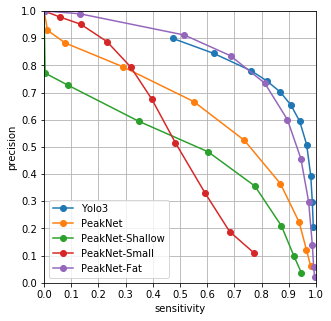

In [30]:
official_names = {"yolov3-peaks":"Yolo3", "newpeaksv2":"PeakNet", "newpeaksv3":"PeakNet-Shallow",
                  "newpeaksv4":"PeakNet-Small", "newpeaksv5":"PeakNet-Fat"}

fig, ax = plt.subplots(1)
for arch in archs:
    x = []
    y = []
    for thresh in threshs:
        sen, pre, _, _ = pre_vs_sen[ (arch, thresh) ]
        if sen != -1:
            x.append( min([sen, 1]) )
            y.append( min([pre, 1]) )
        else:
            break
    plt.plot( x, y, '-o', label=official_names[arch] )
plt.legend()
plt.xlabel('sensitivity')
plt.ylabel('precision')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.grid(True)
ax.set_aspect('equal')
fig.set_size_inches(5, 5)
plt.savefig('output/val_arch_comp.png', bbox_inches='tight', dpi=300)
plt.show()

In [35]:
thresh = 0.25

for arch in archs:
    print(official_names[arch])
    val_sen, val_pre, val_iou, val_dist = pre_vs_sen[ (arch, thresh) ]
    print('val sensitivity:', val_sen)
    print('val precision:', val_pre)
    print('val avg. IOU:', val_iou)
    print('val avg. dist.:', val_dist)
    print("===================================")

Yolo3
val sensitivity: 0.8199959082825803
val precision: 0.7425114714851655
val avg. IOU: 0.21886950907066197
val avg. dist.: 4.510732583296929
PeakNet
val sensitivity: 0.0776954188502274
val precision: 0.8823949955317247
val avg. IOU: 0.15133661752148067
val avg. dist.: 2.7301933143043646
PeakNet-Shallow
val sensitivity: 0.0038241820499504272
val precision: 0.7714285714285715
val avg. IOU: 0.1698482291793525
val avg. dist.: 3.389668036138602
PeakNet-Small
val sensitivity: 0.13449160411060226
val precision: 0.9514584725005567
val avg. IOU: 0.20504633340153913
val avg. dist.: 3.611786979025554
PeakNet-Fat
val sensitivity: 0.6861810112836977
val precision: 0.8352553542009885
val avg. IOU: 0.23234856472207546
val avg. dist.: 4.30598485531328


In [36]:
test_labels = loadLabels("data/test_labels/", 1000)
print("labels of {} images loaded".format(str(len(test_labels))))
print('first data:')
print(test_labels[0])

labels of 1000 images loaded
first data:
[(213, 173), (207, 177), (20, 180), (361, 183), (151, 192), (114, 212), (19, 263), (162, 265), (286, 286), (255, 322), (92, 335), (20, 340), (91, 352), (145, 353), (453, 23), (611, 64), (519, 118), (483, 194), (400, 229), (743, 236), (453, 244), (678, 273), (442, 283), (427, 291), (487, 360), (464, 362), (828, 208), (837, 274), (1057, 298), (841, 305), (1142, 613), (1295, 84), (1330, 157), (1170, 223), (1326, 232), (1404, 233), (1333, 249), (1337, 275), (1186, 285), (1224, 338), (1483, 1389), (1477, 1442)]


******************************************
*****       testing newpeaksv5
******************************************
data/test_results/newpeaksv5.json
results of 1000 images loaded
first data has 256 objects
========== threshold 0.005 ==========
test sensitivity: 0.6861810112836977
test precision: 0.02465464748720755
test avg. IOU: 0.16401733199167123
test avg. dist.: 2.5443693516659964
========== threshold 0.01 ==========
test sensitivity: 0.6861810112836977
test precision: 0.06322734673898928
test avg. IOU: 0.1630785305153117
test avg. dist.: 2.8138167450709286
========== threshold 0.02 ==========
test sensitivity: 0.6861810112836977
test precision: 0.1445651624407708
test avg. IOU: 0.16845529028494147
test avg. dist.: 3.0254448933346376
========== threshold 0.05 ==========
test sensitivity: 0.6861810112836977
test precision: 0.3035341204331169
test avg. IOU: 0.18324147209231123
test avg. dist.: 3.338418262784744
========== threshold 0.1 ==========
test sensitivity: 0.686181011283697

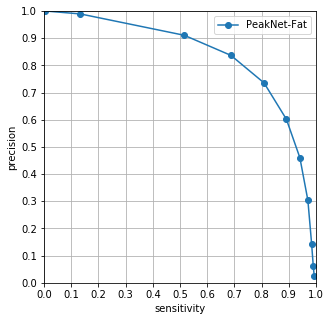

In [38]:
resultPath = "data/test_results/"
arch ="newpeaksv5"

threshs = [0.005, 0.01, 0.02, 0.05, 0.10, 0.15, 0.20, 0.25, 0.3, 0.4, 0.5]
pre_vs_sen = {}

print("******************************************")
print("*****       testing " + arch)
print("******************************************")
test_results = loadResults(resultPath+arch+".json")
print("results of {} images loaded".format(str(len(test_results))))
print('first data has {} objects'.format(str(len(test_results[0]))))

for thresh in threshs:
    print("========== threshold " + str(thresh) + " ==========")
    test_comp_results, test_comp_stats = compare( test_labels, test_results, thresh, (11,11), False )
    test_sen, test_pre, test_iou, test_dist = test_comp_stats
    print('test sensitivity:', val_sen)
    print('test precision:', test_pre)
    print('test avg. IOU:', test_iou)
    print('test avg. dist.:', test_dist)
    pre_vs_sen[ (arch, thresh) ] = test_comp_stats
    if test_sen == -1:
        break
   
x = []
y = []
fig, ax = plt.subplots(1)
for thresh in threshs:
    sen, pre, _, _ = pre_vs_sen[ (arch, thresh) ]
    if sen != -1:
        x.append( min([sen, 1]) )
        y.append( min([pre, 1]) )
    else:
        break
plt.plot( x, y, '-o', label=official_names[arch] )
plt.legend()
plt.xlabel('sensitivity')
plt.ylabel('precision')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.grid(True)
ax.set_aspect('equal')
fig.set_size_inches(5, 5)
plt.savefig('output/' + arch + '_sen_vs_pre.png', bbox_inches='tight', dpi=300)
plt.show()